## Hands-on Activity 9.1 Data Visualization using Pandas and Matplotlib

**Name**: Carigo, Naira Jezreel B.

**Section**: CPE22S3

**Instructor**: Engr. Roman Richard

## Supplementary Activity:


Using the CSV files provided and what we have learned so far in this module complete the following exercises:


1. Plot the rolling 20-day minimum of the Facebook closing price with the pandas plot() method.

2. Create a histogram and KDE of the change from open to close in the price of Facebook stock.

4. Using the earthquake data, create box plots for the magnitudes of each magType used in Indonesia.

5. Make a line plot of the difference between the weekly maximum high price and the weekly minimum low price for Facebook. This should be a single
line.

6. Using matplotlib and pandas, create two subplots side-by-side showing the effect that after-hours trading has had on Facebook's stock price:

> The first subplot will contain a line plot of the daily difference between that day's opening price and the prior day's closing price (be sure to review the Time series section of Aggregating Pandas DataFrames for an easy way to do this).
>
>
> The second subplot will be a bar plot showing the net effect this had monthly, using resample().
>
>
> Bonus #1: Color the bars according to whether they are gains in the stock price (green) or drops in the stock price (red).
>
>
> Bonus #2: Modify the x-axis of the bar plot to show the threeletter abbreviation for the month.tion for the month.

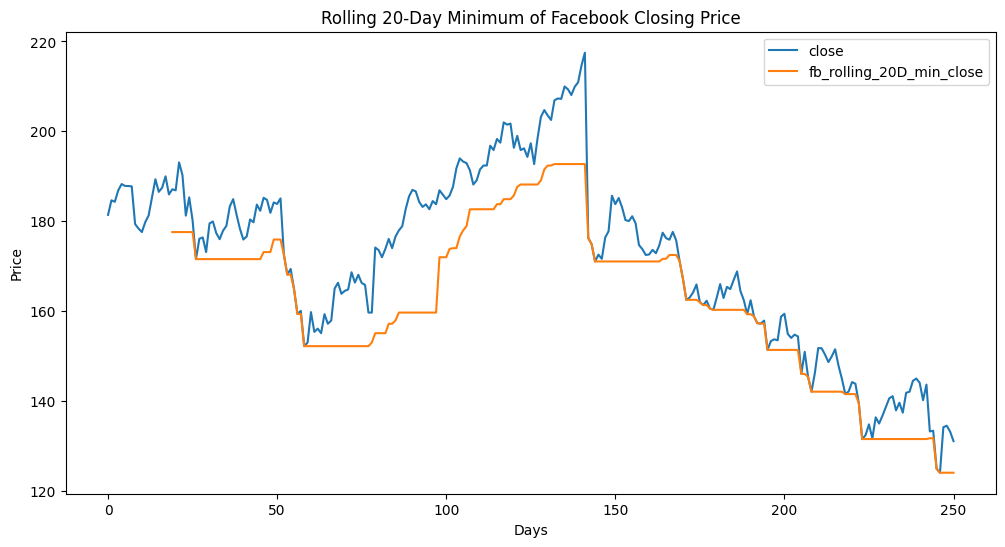

In [1]:
## 1. Rolling 20-Day Minimum of Facebook Closing Price

import pandas as pd
import matplotlib.pyplot as plt

# load the data
fb = pd.read_csv('/fb_stock_prices_2018.csv')

# compute the 20-day rolling minimum of the closing price
fb['fb_rolling_20D_min_close'] = fb['close'].rolling(20).min()

# plot
fb[['close', 'fb_rolling_20D_min_close']].plot(figsize=(12,6), title="Rolling 20-Day Minimum of Facebook Closing Price")
plt.xlabel('Days')
plt.ylabel('Price')
plt.show()

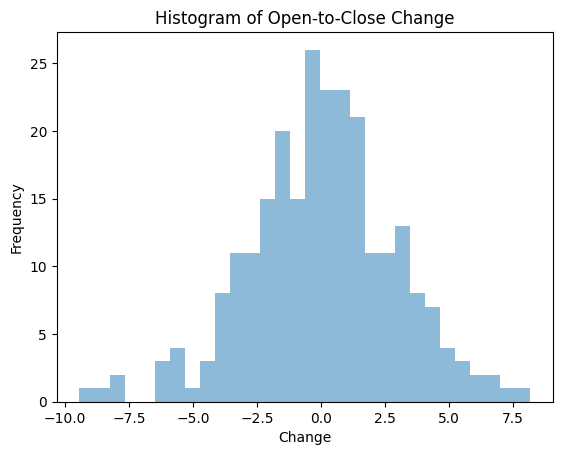

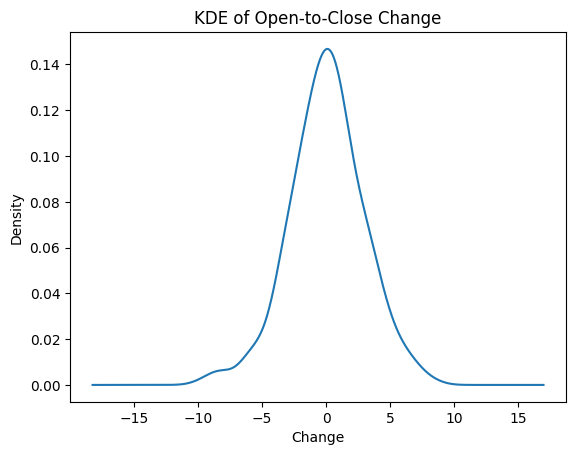

In [2]:
## 2. Histogram and KDE of Change from Open to Close

# create the new column
fb['Open_to_Close_Change'] = fb['close'] - fb['open']

# histogram
fb['Open_to_Close_Change'].plot(kind='hist', bins=30, alpha=0.5, title="Histogram of Open-to-Close Change")
plt.xlabel("Change")
plt.show()

# KDE plot
fb['Open_to_Close_Change'].plot(kind='kde', title="KDE of Open-to-Close Change")
plt.xlabel("Change")
plt.show()

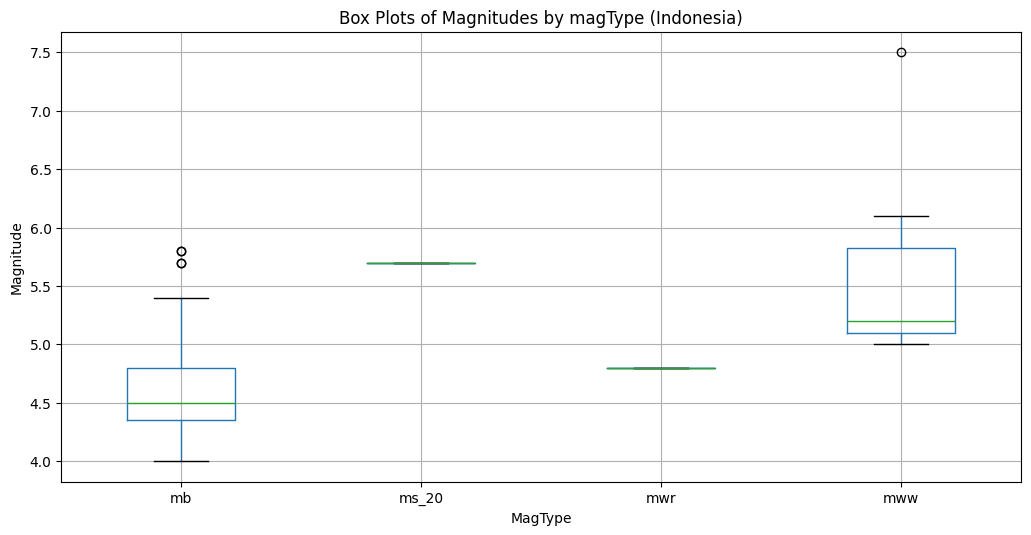

In [3]:
## 3. Box Plots for Earthquake Magnitudes by magType in Indonesia

# load earthquake data
eq = pd.read_csv('/earthquakes-1.csv')

# filter for Indonesia
eqfilter = eq.query('parsed_place == "Indonesia"')

# create boxplot
eqfilter.boxplot(column='mag', by='magType', figsize=(12, 6))
plt.title("Box Plots of Magnitudes by magType (Indonesia)")
plt.suptitle("")  # Remove default title
plt.xlabel("MagType")
plt.ylabel("Magnitude")
plt.show()

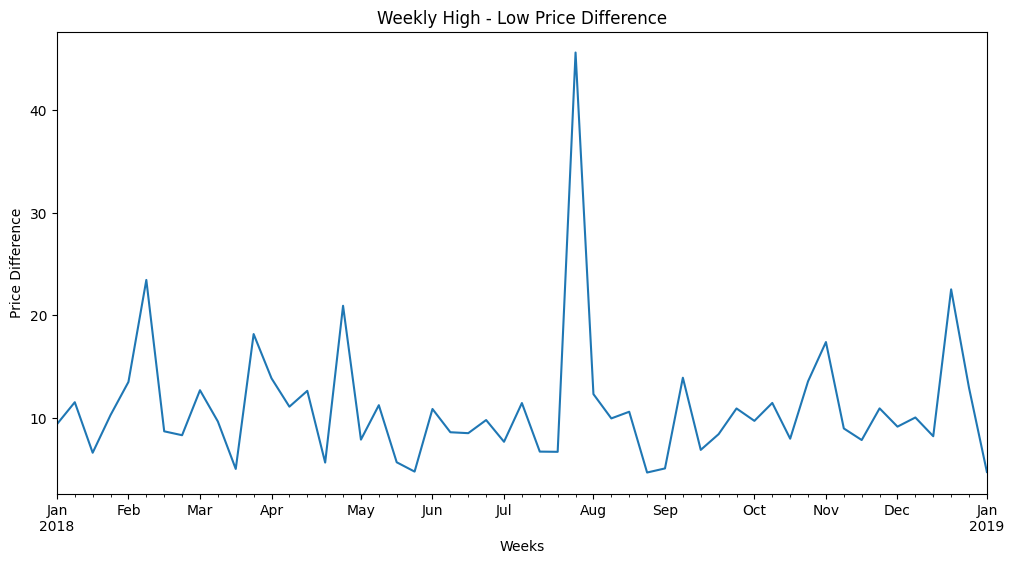

In [4]:
## 4. Weekly High-Low Difference Line Plot

# ensure correct datetime format
fb['date'] = pd.to_datetime(fb['date'])
fb.set_index('date', inplace=True)

# weekly resample
weekly_high_low_diff = fb.resample('W').agg({'high': 'max', 'low': 'min'})
weekly_high_low_diff['High_Low_Diff'] = weekly_high_low_diff['high'] - weekly_high_low_diff['low']

# plot
weekly_high_low_diff['High_Low_Diff'].plot(figsize=(12, 6), title="Weekly High - Low Price Difference")
plt.xlabel("Weeks")
plt.ylabel("Price Difference")
plt.show()

<ipython-input-5-1bf8ea7052fa>:20: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_effect = fb['Daily_Open_Close_Diff'].resample('M').sum()


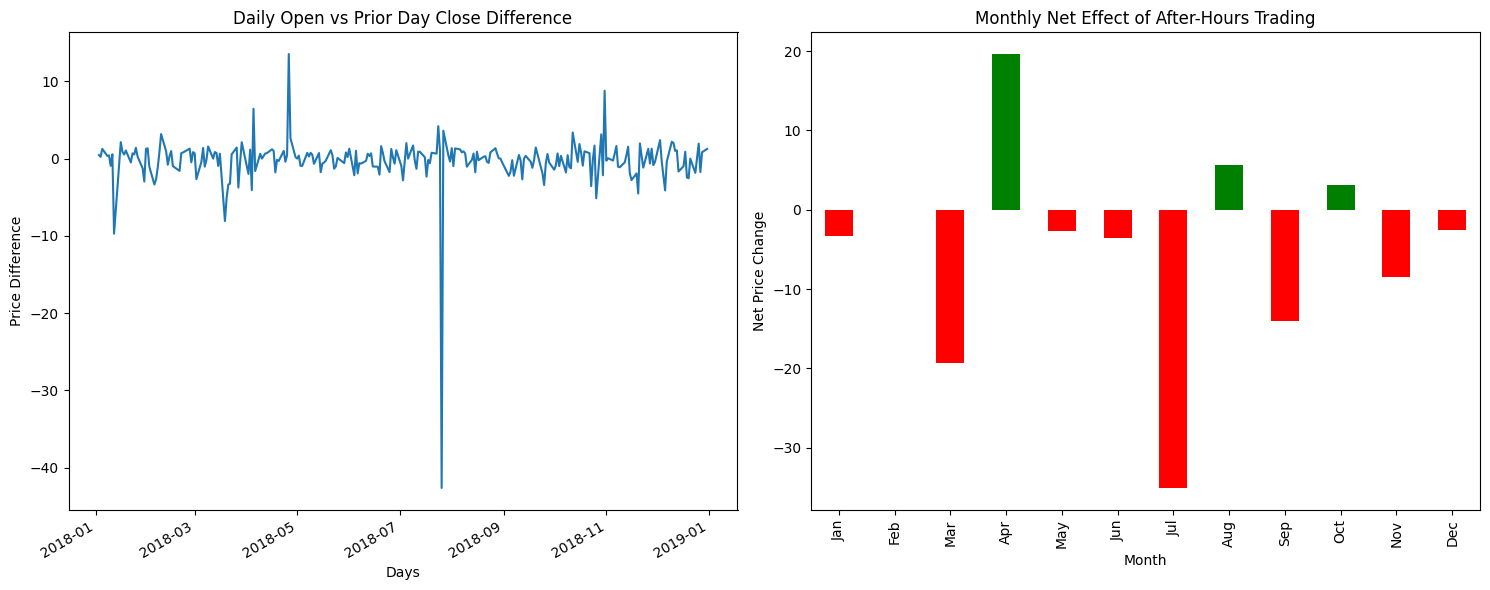

In [5]:
## 5. Two Subplots: Daily & Monthly After-Hours Trading Effects

# reset index for proper time series handling
fb.reset_index(inplace=True)
fb.set_index('date', inplace=True)

# calculate daily open vs previous day's close
fb['Prior_Day_Close'] = fb['close'].shift(1)
fb['Daily_Open_Close_Diff'] = fb['open'] - fb['Prior_Day_Close']

# setup subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# line plot: Daily difference
fb['Daily_Open_Close_Diff'].plot(ax=axes[0], title="Daily Open vs Prior Day Close Difference")
axes[0].set_xlabel("Days")
axes[0].set_ylabel("Price Difference")

# monthly net effect (resample and sum)
monthly_effect = fb['Daily_Open_Close_Diff'].resample('M').sum()

# color bars
colors = ['green' if val > 0 else 'red' for val in monthly_effect]

# bar plot: monthly effect
monthly_effect.plot(kind='bar', ax=axes[1], color=colors, title="Monthly Net Effect of After-Hours Trading")
axes[1].set_xlabel("Month")
axes[1].set_ylabel("Net Price Change")
axes[1].set_xticklabels([pd.Timestamp(idx).strftime('%b') for idx in monthly_effect.index])

plt.tight_layout()
plt.show()

##R